In [1]:
import time

import pandas as pd
import preprocessing
import seaborn
from matplotlib import pyplot as plt
from sklearn.impute import *

In [2]:
print('Reading data...')
start_time = time.time()
data = pd.read_csv('./data/training_set_VU_DM.csv')
print(f'Data read in {time.time() - start_time} s')

Reading data...
Data read in 26.526415586471558 s


In [3]:
print(data.head())
print(data.describe())
nan_data_info = pd.DataFrame({'NaN Count': data.isna().sum(), 'Data Type': data.dtypes})
print(nan_data_info)

   srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-04-04 08:32:15       12                          187   
1        1  2013-04-04 08:32:15       12                          187   
2        1  2013-04-04 08:32:15       12                          187   
3        1  2013-04-04 08:32:15       12                          187   
4        1  2013-04-04 08:32:15       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219      893   
1                      NaN                   NaN              219    10404   
2                      NaN                   NaN              219    21315   
3                      NaN                   NaN              219    27348   
4                      NaN                   NaN              219    29604   

   prop_starrating  prop_review_score  ...  comp6_rate_percent_diff  \
0                3   

In [4]:
data['score'] = data.click_bool + data.booking_bool * 5
data_features = data.drop(['click_bool', 'booking_bool', 'gross_bookings_usd', 'position'], axis=1)

data_without_date = data_features.drop(columns=['date_time'])
preprocessing.merge_comp(data_without_date)
print(data_without_date)

# corr = data_without_date.corr()
# print(corr)
# 
# plt.figure(figsize=(8, 6))
# seaborn.heatmap(corr, annot=False, cmap='inferno', fmt=".2f", linewidths=0.5)
# plt.title('Pearson Correlation Heatmap')
# plt.show()

         srch_id  site_id  visitor_location_country_id  \
0              1       12                          187   
1              1       12                          187   
2              1       12                          187   
3              1       12                          187   
4              1       12                          187   
...          ...      ...                          ...   
4958342   332785        5                          219   
4958343   332785        5                          219   
4958344   332785        5                          219   
4958345   332785        5                          219   
4958346   332785        5                          219   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
0                            NaN                   NaN              219   
1                            NaN                   NaN              219   
2                            NaN                   NaN              219   
3  

In [5]:
imputer = SimpleImputer(strategy='constant', fill_value=-10)
print(imputer)
filled_data = imputer.fit_transform(data_without_date)
df_filled = pd.DataFrame(filled_data, columns=data_without_date.columns)
print(df_filled)

SimpleImputer(fill_value=-10, strategy='constant')
          srch_id  site_id  visitor_location_country_id  \
0             1.0     12.0                        187.0   
1             1.0     12.0                        187.0   
2             1.0     12.0                        187.0   
3             1.0     12.0                        187.0   
4             1.0     12.0                        187.0   
...           ...      ...                          ...   
4958342  332785.0      5.0                        219.0   
4958343  332785.0      5.0                        219.0   
4958344  332785.0      5.0                        219.0   
4958345  332785.0      5.0                        219.0   
4958346  332785.0      5.0                        219.0   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
0                          -10.0                 -10.0            219.0   
1                          -10.0                 -10.0            219.0   
2              

In [6]:
nan_data_info = pd.DataFrame({'NaN Count': df_filled.isna().sum(), 'Data Type': df_filled.dtypes})
print(nan_data_info)
print(df_filled.describe())

                             NaN Count Data Type
srch_id                              0   float64
site_id                              0   float64
visitor_location_country_id          0   float64
visitor_hist_starrating              0   float64
visitor_hist_adr_usd                 0   float64
prop_country_id                      0   float64
prop_id                              0   float64
prop_starrating                      0   float64
prop_review_score                    0   float64
prop_brand_bool                      0   float64
prop_location_score1                 0   float64
prop_location_score2                 0   float64
prop_log_historical_price            0   float64
price_usd                            0   float64
promotion_flag                       0   float64
srch_destination_id                  0   float64
srch_length_of_stay                  0   float64
srch_booking_window                  0   float64
srch_adults_count                    0   float64
srch_children_count 

                              srch_id   site_id  visitor_location_country_id  \
srch_id                      1.000000  0.003331                    -0.006097   
site_id                      0.003331  1.000000                    -0.305921   
visitor_location_country_id -0.006097 -0.305921                     1.000000   
visitor_hist_starrating      0.001634  0.048299                    -0.047834   
visitor_hist_adr_usd         0.001783  0.050625                    -0.047632   
prop_country_id             -0.005468 -0.312593                     0.482787   
prop_id                     -0.000166  0.002943                     0.000432   
prop_starrating             -0.001577  0.174845                    -0.112911   
prop_review_score           -0.002886 -0.070655                     0.061481   
prop_brand_bool             -0.003828 -0.196217                     0.182405   
prop_location_score1         0.000439  0.178399                    -0.121392   
prop_location_score2        -0.003199  0

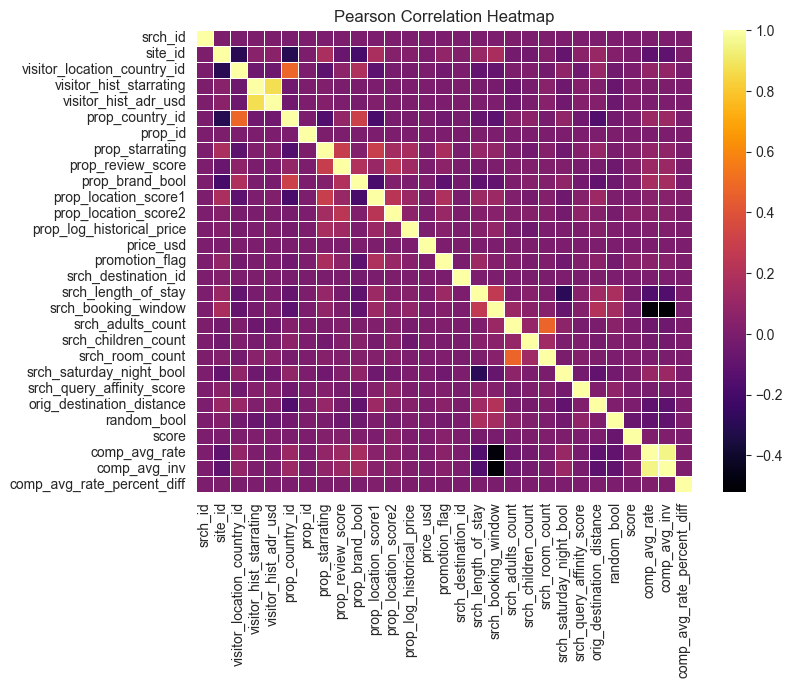

In [7]:
corr = df_filled.corr()
print(corr)

plt.figure(figsize=(8, 6))
seaborn.heatmap(corr, annot=False, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [8]:
df_filled.to_csv('./data/filled_training_set.csv', index=False)